In [1]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.datasets import load_wine
from sklearn.metrics import(
    accuracy_score,
    precision_score,
    recall_score,
    f1_score,
    classification_report,
    confusion_matrix,
    ConfusionMatrixDisplay,
    roc_curve,
    roc_auc_score,
    RocCurveDisplay
)
import matplotlib.pyplot as plt

In [13]:
wine = load_wine()
X = wine.data
y = wine.target

In [14]:
mask = (y==0) | (y==1)
X = X[mask]
y = y[mask]

In [15]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [16]:
rfc = RandomForestClassifier(n_estimators=100, max_depth=5, max_features=20, random_state=42)

In [17]:
rfc.fit(X_train, y_train)

RandomForestClassifier(max_depth=5, max_features=20, random_state=42)

In [7]:
y_pred = rfc.predict(X_test)

In [9]:
print(f"Accuracy: {accuracy_score(y_test, y_pred)}")
print(f"Precision: {precision_score(y_test, y_pred, average = 'weighted')}")
print(f"Recall: {recall_score(y_test, y_pred, average='weighted')}")
print(f"F1 Score: {f1_score(y_test, y_pred, average='weighted')}")
print(f"Classification Report:\n{classification_report(y_test, y_pred)}")

Accuracy: 0.9722222222222222
Precision: 0.974074074074074
Recall: 0.9722222222222222
F1 Score: 0.9717752234993614
Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        14
           1       0.93      1.00      0.97        14
           2       1.00      0.88      0.93         8

    accuracy                           0.97        36
   macro avg       0.98      0.96      0.97        36
weighted avg       0.97      0.97      0.97        36



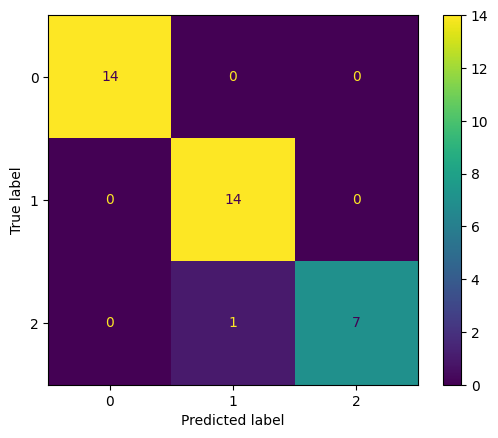

In [10]:
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=rfc.classes_)
disp.plot()
plt.show()

In [18]:
y_probs = rfc.predict_proba(X_test)[:,1]

In [19]:
fpr, tpr, thresholds = roc_curve(y_test, y_probs)

In [20]:
auc = roc_auc_score(y_test, y_probs)
print(f"AUC: {auc}")

AUC: 1.0


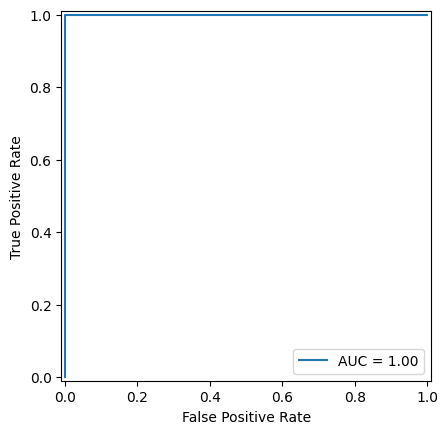

In [21]:
RocCurveDisplay(fpr=fpr, tpr=tpr, roc_auc=auc).plot()
plt.show()